## Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

--2021-03-21 11:24:14--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10330 (10K) [text/plain]
Saving to: ‘lut.py’

lut.py              100%[===================>]  10.09K  --.-KB/s    in 0s      

2021-03-21 11:24:14 (94.1 MB/s) - ‘lut.py’ saved [10330/10330]

--2021-03-21 11:24:14--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 997750 (974K) [image/jpeg]
Saving to: ‘100z

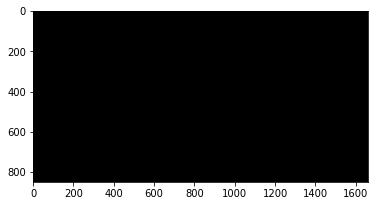

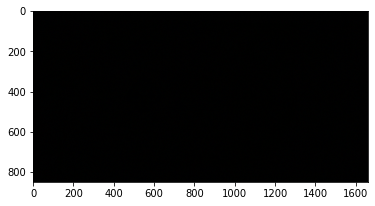

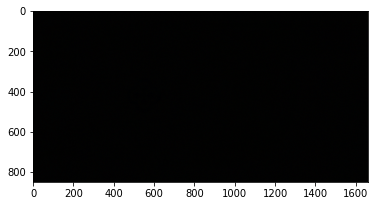

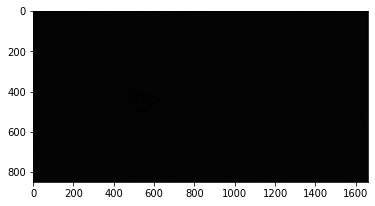

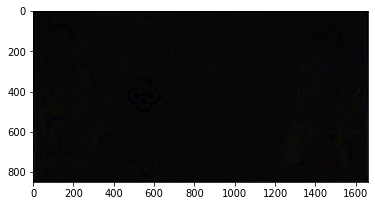

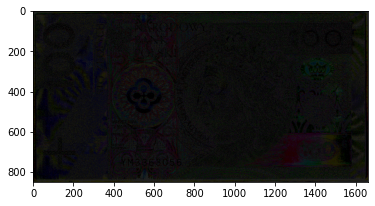

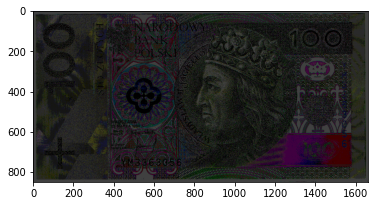

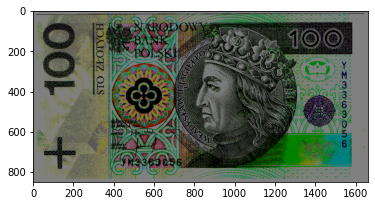

Rekonstrukcja obrazu:


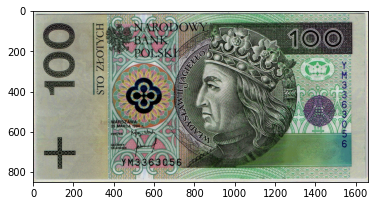

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

if not os.path.exists("100zloty.jpg") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

img = cv2.imread('100zloty.jpg')

slices = []

print("Płaszczyne bitowe:")

for i in range(0, 8):

  # Rozdzielamy plaszczyzne bitowe
  slices.append((img >> i) & 1)

  # Wyswietlamy wynik
  plt.imshow((2 ** i) * slices[i])
  plt.show()

print("Rekonstrukcja obrazu:")

# Rekonstrujemy obraz z plaszczyzn
img = ((2 ** 5) * slices[5]) + ((2 ** 6) * slices[6]) + ((2 ** 7) * slices[7])


plt.imshow(img)
plt.show()
